### Understanding the Determinants of Foreign Direct Investment in Mexico: Integrating Socio-Economic, Geographic, and Machine Learning Insights


In [100]:
#Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

Define enviromental information to run the model

In [42]:
env = {
    'raw data route': '../data/raw/',
}

In [80]:
data = pd.read_csv(env['raw data route']+'data.csv')
fdi_raw = pd.read_csv(env['raw data route']+'fdi.csv')

In [81]:
# Function to clean numeric strings
def clean_numeric_column(column):
    # Replace commas with periods for decimals and remove points for thousands
    return column.str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)

In [82]:
data['Avg Annual FDI 2014–19 (USD millions)'] = clean_numeric_column(fdi_raw['Mean'])

In [83]:
#resulting database
data.head()

,State,Avg Annual FDI 2014–19 (USD millions),GDP (USD millions),Avg Annual GDP Growth 2014–19 (%),Population (2020 millions),Educational Attainment (Tertiary %),Unemployment Rate (%),Road Density,Access to Coastline,Ocean Connected,Distance to Mexico City (km),Distance to El Paso (km)
0,Aguascalientes,935.3,16315.8,3.0,1.42,20,3.5,1.2,0,Not Connected,510,1340
1,Baja California,1408.6,36842.1,2.5,3.77,19,3.4,0.6,1,Pacific,2200,1120
2,Baja California Sur,428.1,11052.6,3.5,0.80,17,3.2,0.4,1,Pacific,1550,1900
3,Campeche,251.2,25263.2,-0.5,1.00,15,3.3,0.5,1,Gulf of Mexico,1000,2140
4,Chiapas,165.1,21052.6,1.5,5.54,9,2.8,0.7,1,Pacific,870,2360


In [85]:
data.shape

(32, 12)

### Base Analysis

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  32 non-null     object 
 1   Avg Annual FDI 2014–19 (USD millions)  32 non-null     float64
 2   GDP (USD millions)                     32 non-null     float64
 3   Avg Annual GDP Growth 2014–19 (%)      32 non-null     float64
 4   Population (2020 millions)             32 non-null     float64
 5   Educational Attainment (Tertiary %)    32 non-null     int64  
 6   Unemployment Rate (%)                  32 non-null     float64
 7   Road Density                           32 non-null     float64
 8   Access to Coastline                    32 non-null     int64  
 9   Ocean Connected                        32 non-null     object 
 10  Distance to Mexico City (km)           32 non-null     int64  
 11  Distance

In [87]:
data.describe()

,Avg Annual FDI 2014–19 (USD millions),GDP (USD millions),Avg Annual GDP Growth 2014–19 (%),Population (2020 millions),Educational Attainment (Tertiary %),Unemployment Rate (%),Road Density,Access to Coastline,Distance to Mexico City (km),Distance to El Paso (km)
count,32.000000,32.000000,32.000000,32.000000,32.0000,32.000000,32.00000,32.000000,32.000000,32.00000
mean,1042.815625,40082.231250,2.081250,3.943437,16.5625,66.428125,0.95000,0.531250,714.687500,1617.50000
std,1252.650113,39986.396346,0.868977,3.286054,4.4209,357.234440,0.46559,0.507007,555.190955,516.98256
min,100.200000,6315.800000,-0.500000,0.730000,9.0000,2.800000,0.40000,0.000000,0.000000,460.00000
25%,303.500000,16184.225000,1.800000,1.850000,13.7500,3.100000,0.70000,0.000000,267.500000,1280.00000
50%,467.250000,25789.500000,2.000000,3.050000,16.0000,3.250000,0.90000,1.000000,657.500000,1625.00000
75%,1327.750000,45657.875000,2.500000,4.947500,19.0000,3.500000,1.10000,1.000000,932.500000,1862.50000
max,6417.900000,189473.700000,4.000000,17.070000,30.0000,2024.100000,3.00000,1.000000,2200.000000,2850.00000


Check for missing data

In [88]:
print(data.isnull().sum())

State                                    0
Avg Annual FDI 2014–19 (USD millions)    0
GDP (USD millions)                       0
Avg Annual GDP Growth 2014–19 (%)        0
Population (2020 millions)               0
Educational Attainment (Tertiary %)      0
Unemployment Rate (%)                    0
Road Density                             0
Access to Coastline                      0
Ocean Connected                          0
Distance to Mexico City (km)             0
Distance to El Paso (km)                 0
dtype: int64


### Descriptive Analysis

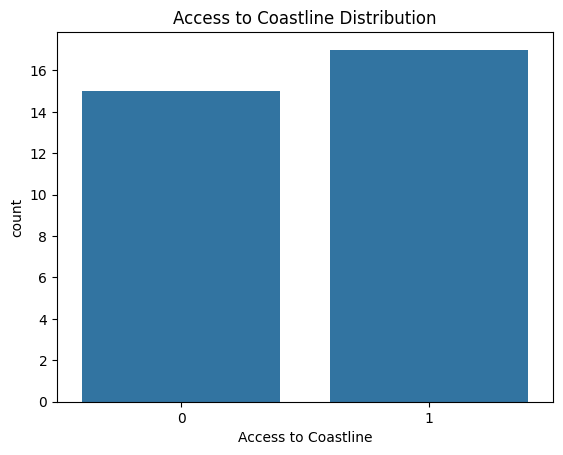

In [89]:
# Bar chart for Access to Coastline (categorical variable)
sns.countplot(data=data, x="Access to Coastline")
plt.title("Access to Coastline Distribution")
plt.show()

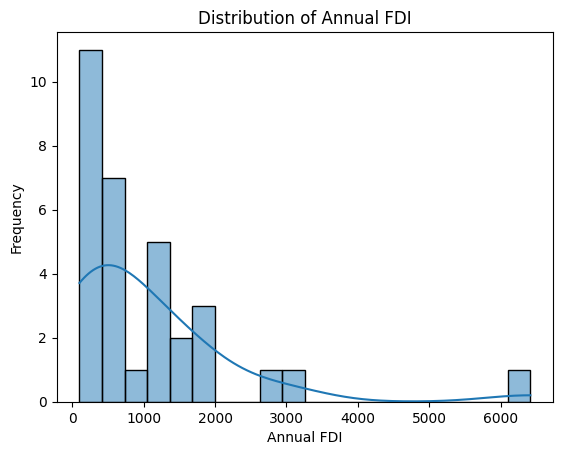

In [90]:
# Histogram with KDE for Annual FDI
sns.histplot(data["Avg Annual FDI 2014–19 (USD millions)"], kde=True, bins=20)
plt.title("Distribution of Annual FDI")
plt.xlabel("Annual FDI")
plt.ylabel("Frequency")
plt.show()

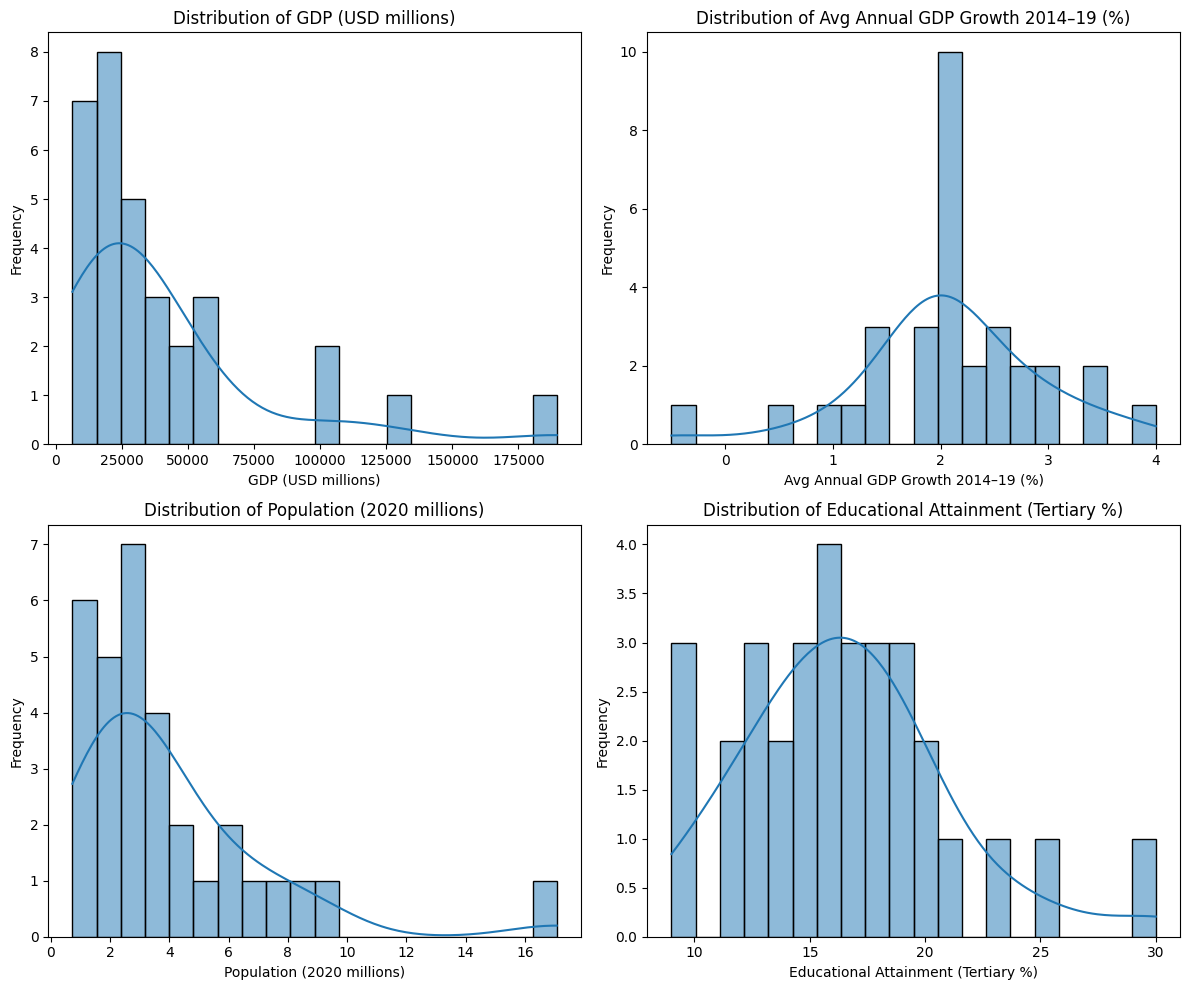

In [93]:
# Histograms for socio-economic variables
variables = ["GDP (USD millions)", "Avg Annual GDP Growth 2014–19 (%)", "Population (2020 millions)", "Educational Attainment (Tertiary %)"]
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid, adjust figure size as needed

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms on each subplot
for i, var in enumerate(variables):
    sns.histplot(data[var], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [94]:
data['Avg Annual GDP Growth 2014–19 (%)'].describe()

count    32.000000
mean      2.081250
std       0.868977
min      -0.500000
25%       1.800000
50%       2.000000
75%       2.500000
max       4.000000
Name: Avg Annual GDP Growth 2014–19 (%), dtype: float64

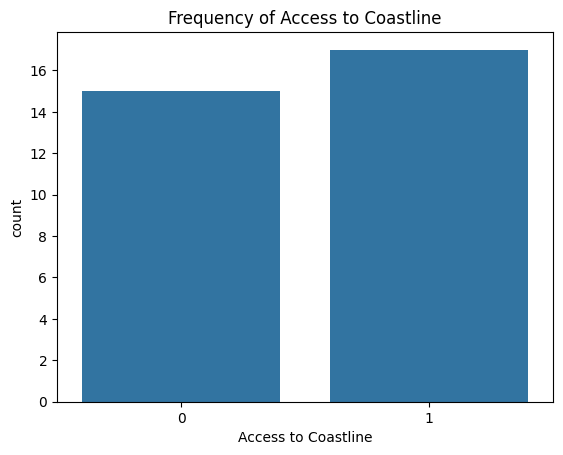

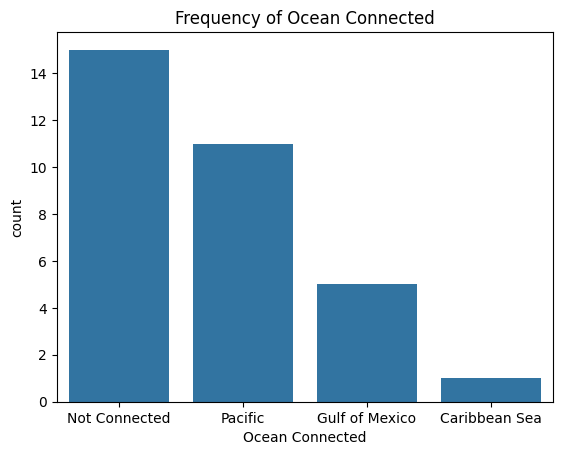

In [96]:
categorical_vars = ["Access to Coastline", "Ocean Connected"]
for cat_var in categorical_vars:
    sns.countplot(data=data, x=cat_var)
    plt.title(f"Frequency of {cat_var}")
    plt.show()

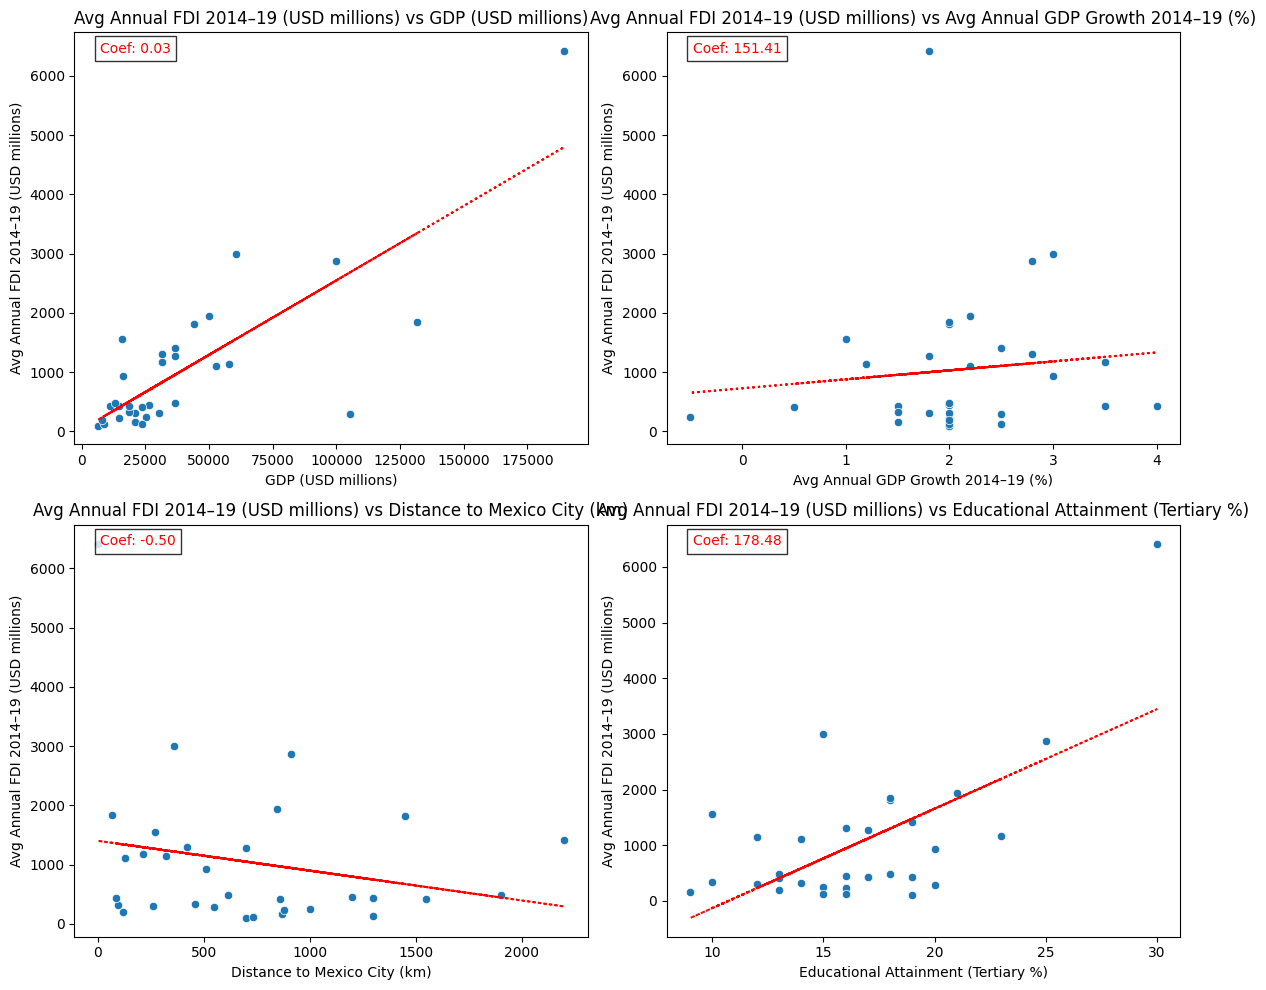

In [102]:
# Scatter plots for numerical relationships
pairs = [
    ("GDP (USD millions)", "Avg Annual FDI 2014–19 (USD millions)"),
    ("Avg Annual GDP Growth 2014–19 (%)", "Avg Annual FDI 2014–19 (USD millions)"),
    ("Distance to Mexico City (km)", "Avg Annual FDI 2014–19 (USD millions)"),
    ("Educational Attainment (Tertiary %)", "Avg Annual FDI 2014–19 (USD millions)")
]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid, adjust figure size as needed

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot scatterplots and linear regression lines
for i, (x, y) in enumerate(pairs):
    # Scatter plot
    sns.scatterplot(data=data, x=x, y=y, ax=axes[i])
    
    # Extract x and y data
    X = data[x].values.reshape(-1, 1)  # Reshape for sklearn
    Y = data[y].values
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, Y)
    y_pred = model.predict(X)
    
    # Plot the regression line
    axes[i].plot(data[x], y_pred, color="red", linestyle="dotted", label="Regression Line")
    
    # Add the regression coefficient on the plot
    coef = model.coef_[0]
    axes[i].text(0.05, 0.95, f"Coef: {coef:.2f}", transform=axes[i].transAxes,
                 fontsize=10, color="red", bbox=dict(facecolor='white', alpha=0.8))
    
    # Titles and labels
    axes[i].set_title(f"{y} vs {x}")
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [103]:
X = data["Distance to El Paso (km)"].values.reshape(-1, 1)  # Reshape for sklearn
Y = data["Avg Annual FDI 2014–19 (USD millions)"].values
    
# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
# Add the regression coefficient on the plot
coef = model.coef_[0]
print(f"Coef: {coef:.2f}")

Coef: -0.73


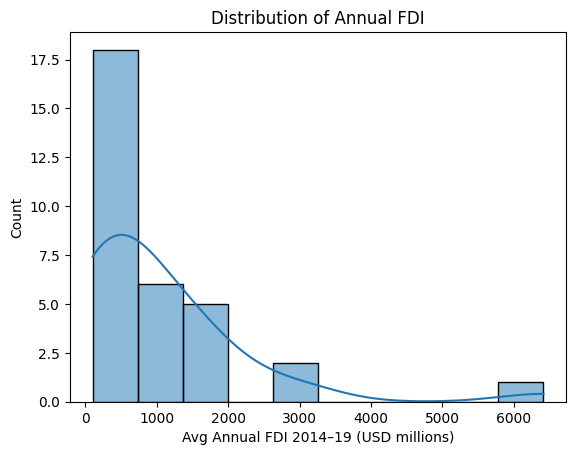

In [48]:
# Distribution plot for Annual FDI
sns.histplot(data["Avg Annual FDI 2014–19 (USD millions)"], kde=True)
plt.title("Distribution of Annual FDI")
plt.show()

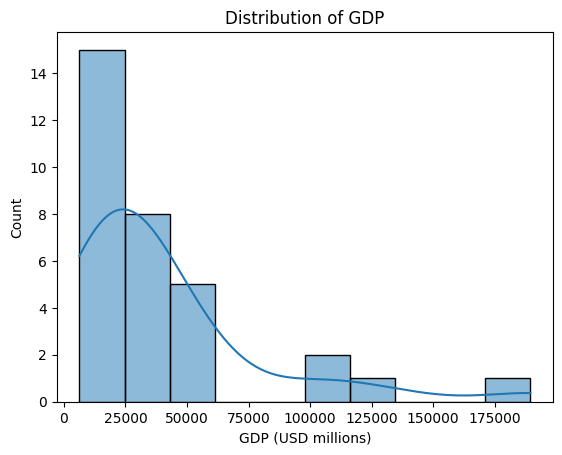

In [49]:
# Distribution plot for GDP
sns.histplot(data["GDP (USD millions)"], kde=True)
plt.title("Distribution of GDP")
plt.show()

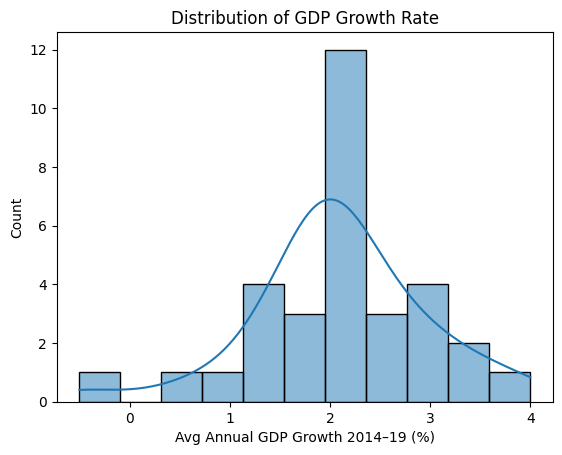

In [50]:
# Distribution plot for GDP
sns.histplot(data["Avg Annual GDP Growth 2014–19 (%)"], kde=True)
plt.title("Distribution of GDP Growth Rate")
plt.show()

Correlation Analysis

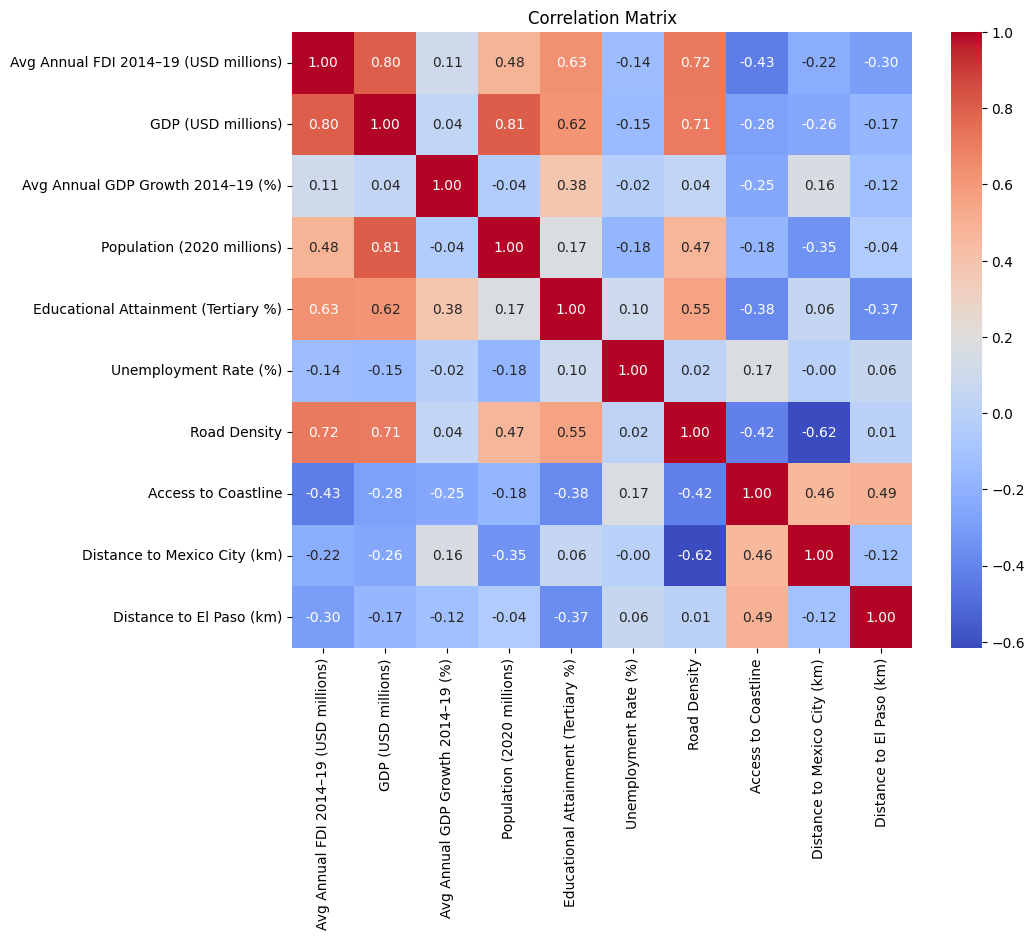

In [107]:
#correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [119]:
# Highlight correlations with FDI above a threshold
correlation_threshold = 0.1
correlations = numeric_data.corr()["Avg Annual FDI 2014–19 (USD millions)"].sort_values(ascending=False)
significant_correlations = correlations[correlations < correlation_threshold]
print("Significant Correlations with Annual FDI:")
print(significant_correlations)

Significant Correlations with Annual FDI:
Unemployment Rate (%)          -0.136905
Distance to Mexico City (km)   -0.223010
Distance to El Paso (km)       -0.299524
Access to Coastline            -0.428011
Name: Avg Annual FDI 2014–19 (USD millions), dtype: float64


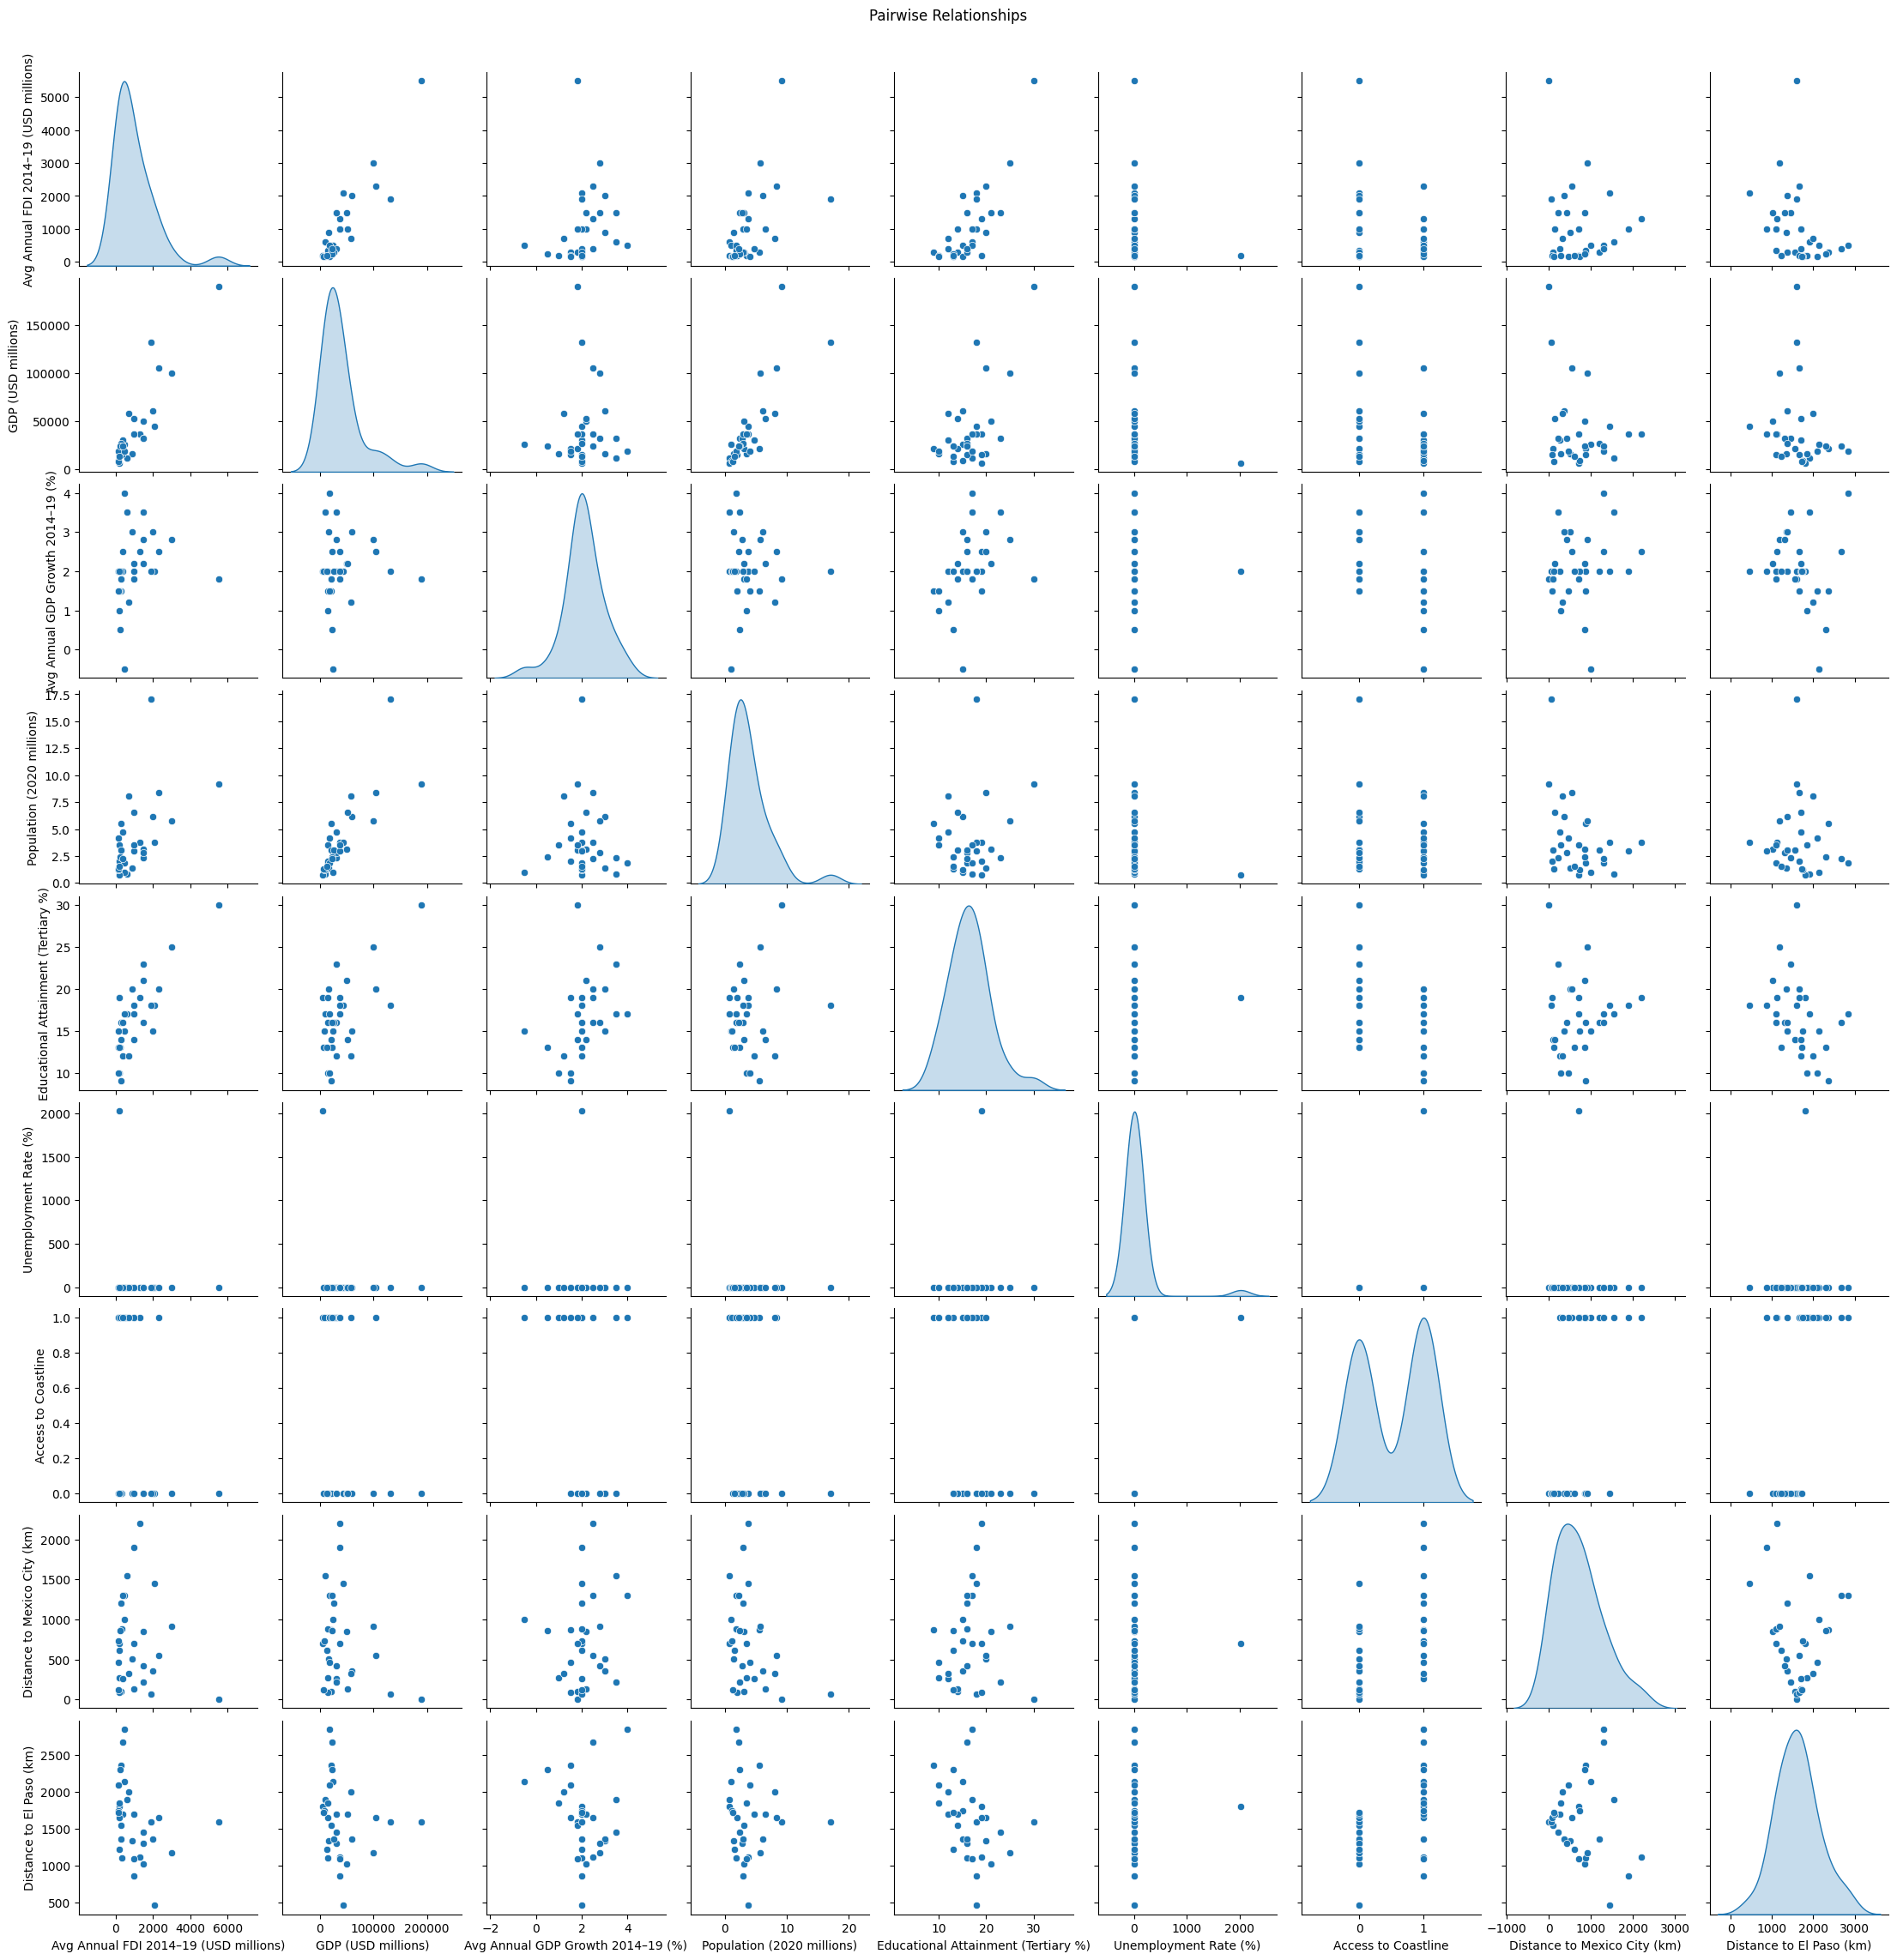

In [31]:
sns.pairplot(data.select_dtypes(include=["number"]), diag_kind="kde")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

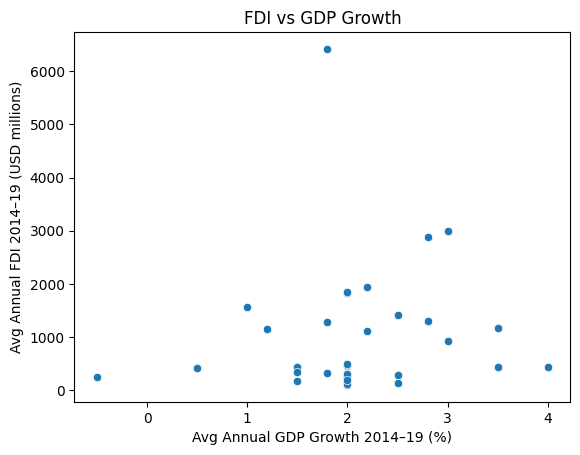

In [52]:
sns.scatterplot(data=data, x="Avg Annual GDP Growth 2014–19 (%)", y="Avg Annual FDI 2014–19 (USD millions)")
plt.title("FDI vs GDP Growth")
plt.show()

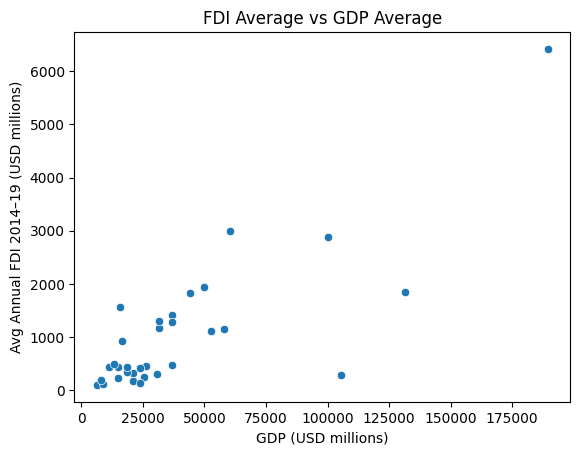

In [56]:
sns.scatterplot(data=data, x="GDP (USD millions)", y="Avg Annual FDI 2014–19 (USD millions)")
plt.title("FDI Average vs GDP Average")
plt.show()

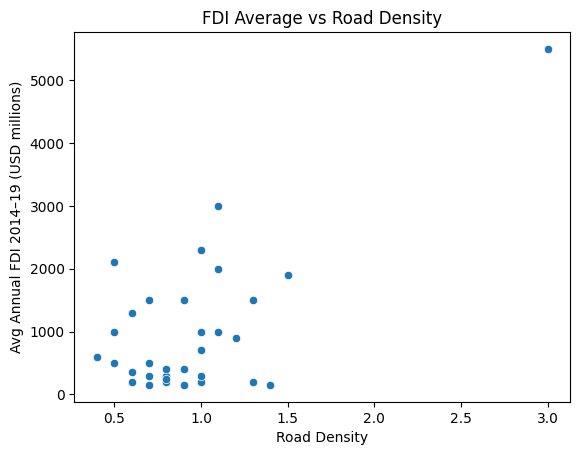

In [70]:
sns.scatterplot(data=data, x="Road Density", y="Avg Annual FDI 2014–19 (USD millions)")
plt.title("FDI Average vs Road Density")
plt.show()

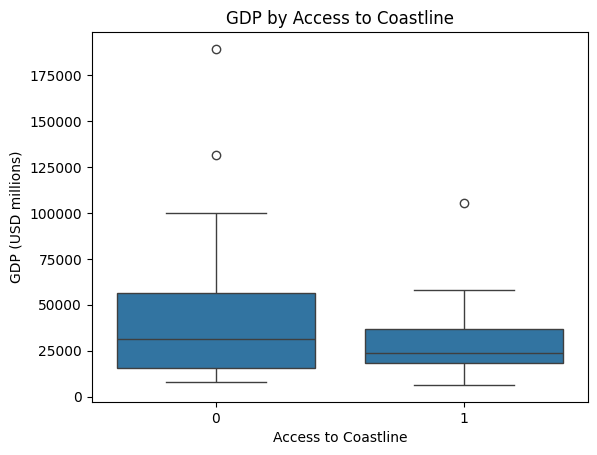

In [106]:
sns.boxplot(data=data, x="Access to Coastline", y="GDP (USD millions)")
plt.title("GDP by Access to Coastline")
plt.show()

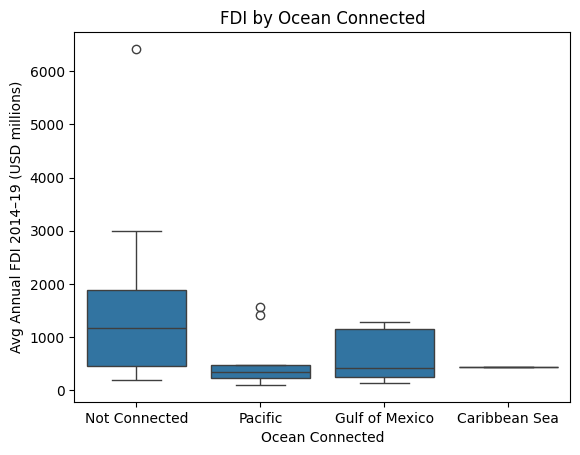

In [58]:
sns.boxplot(data=data, x="Ocean Connected", y="Avg Annual FDI 2014–19 (USD millions)")
plt.title("FDI by Ocean Connected")
plt.show()

In [59]:
print(data.groupby("Access to Coastline")["Avg Annual FDI 2014–19 (USD millions)"].mean())

Access to Coastline
0    1604.600000
1     547.123529
Name: Avg Annual FDI 2014–19 (USD millions), dtype: float64


In [60]:
print(data.groupby("Ocean Connected")["Avg Annual FDI 2014–19 (USD millions)"].mean())

Ocean Connected
Caribbean Sea      430.100000
Gulf of Mexico     644.240000
Not Connected     1604.600000
Pacific            513.618182
Name: Avg Annual FDI 2014–19 (USD millions), dtype: float64


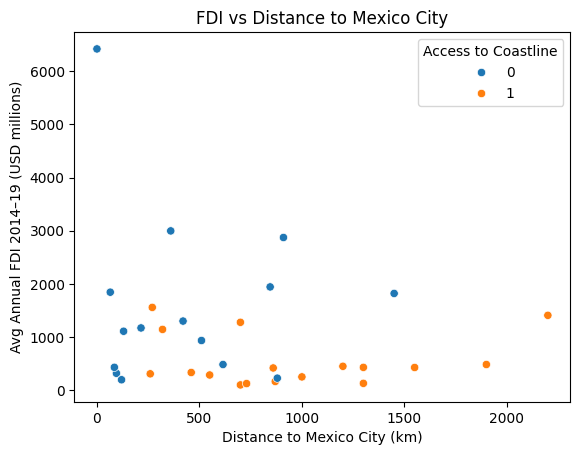

In [61]:
sns.scatterplot(data=data, x="Distance to Mexico City (km)", y="Avg Annual FDI 2014–19 (USD millions)", hue="Access to Coastline")
plt.title("FDI vs Distance to Mexico City")
plt.show()

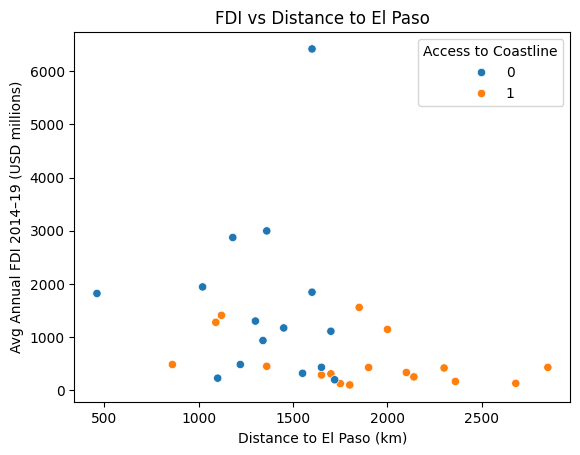

In [62]:
sns.scatterplot(data=data, x="Distance to El Paso (km)", y="Avg Annual FDI 2014–19 (USD millions)", hue="Access to Coastline")
plt.title("FDI vs Distance to El Paso")
plt.show()

### Classification Task Determination

In [120]:
# Assuming your dataframe is named df and the FDI column is "Avg_FDI"
threshold = data['Avg Annual FDI 2014–19 (USD millions)'].quantile(0.70)  # 70th percentile cutoff

# Create a binary variable: 1 if above threshold, 0 if below
data['High_Investment'] = (data['Avg Annual FDI 2014–19 (USD millions)'] > threshold).astype(int)

In [121]:
data

,State,Avg Annual FDI 2014–19 (USD millions),GDP (USD millions),Avg Annual GDP Growth 2014–19 (%),Population (2020 millions),Educational Attainment (Tertiary %),Unemployment Rate (%),Road Density,Access to Coastline,Ocean Connected,Distance to Mexico City (km),Distance to El Paso (km),High_Investment
0,Aguascalientes,935.3,16315.8,3.0,1.42,20,3.5,1.2,0,Not Connected,510,1340,0
1,Baja California,1408.6,36842.1,2.5,3.77,19,3.4,0.6,1,Pacific,2200,1120,1
2,Baja California Sur,428.1,11052.6,3.5,0.80,17,3.2,0.4,1,Pacific,1550,1900,0
3,Campeche,251.2,25263.2,-0.5,1.00,15,3.3,0.5,1,Gulf of Mexico,1000,2140,0
4,Chiapas,165.1,21052.6,1.5,5.54,9,2.8,0.7,1,Pacific,870,2360,0
5,Chihuahua,1820.2,44210.5,2.0,3.77,18,3.3,0.5,0,Not Connected,1450,460,1
6,Ciudad de México,6417.9,189473.7,1.8,9.21,30,4.0,3.0,0,Not Connected,0,1600,1
7,Coahuila de Zaragoza,1942.9,50000.0,2.2,3.15,21,3.5,0.7,0,Not Connected,845,1020,1
8,Colima,100.2,6315.8,2.0,0.73,19,2024.1,1.0,1,Pacific,700,1800,0
9,Durango,227.3,14736.8,2.0,1.85,16,3.2,0.6,0,Not Connected,880,1100,0


In [123]:
class_counts = data['High_Investment'].value_counts()
print("Class Distribution:")
print(class_counts)
# Optional: Calculate class proportions
class_proportions = class_counts / class_counts.sum()
print("Class Proportions:")
print(class_proportions)

Class Distribution:
High_Investment
0    22
1    10
Name: count, dtype: int64
Class Proportions:
High_Investment
0    0.6875
1    0.3125
Name: count, dtype: float64


### Regression modeling for FDI


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X = data.drop(columns=['Avg Annual FDI 2014–19 (USD millions)','State','High_Investment'])
y = data['Avg Annual FDI 2014–19 (USD millions)']

# Train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [134]:
X_train["Ocean Connected"] = pd.Categorical(X_train["Ocean Connected"]).codes
X_train["Access to Coastline"] = pd.Categorical(X_train["Access to Coastline"]).codes

X_test["Ocean Connected"] = pd.Categorical(X_test["Ocean Connected"]).codes
X_test["Access to Coastline"] = pd.Categorical(X_test["Access to Coastline"]).codes

In [151]:
# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [152]:
lin_reg_pred = lin_reg.predict(X_test)

In [153]:
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)

In [154]:
print("Linear Regression MSE:", lin_reg_mse)

Linear Regression MSE: 746395932194.5326


In [130]:
# 2. Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

Ridge()

In [149]:
# 3. Lasso Regression
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [132]:
# 4. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [135]:
models = {'Linear': lin_reg, 'Ridge': ridge, 'Lasso': lasso, 'RandomForest': rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Model - MSE: {mse:.2f}, R²: {r2:.3f}")

Linear Model - MSE: 746395932194.53, R²: -6385363.081
Ridge Model - MSE: 13820811831.19, R²: -118235.062
Lasso Model - MSE: 715494183170.01, R²: -6121000.817
RandomForest Model - MSE: 417519.28, R²: -2.572


In [147]:
# For linear models (e.g., Ridge)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values('Coefficient', ascending=False)
print("Lasso Regression Coefficients:")
print(coef_df)

# For Random Forest
importances = rf.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)
print("Random Forest Feature Importances:")
print(feat_imp_df)

Lasso Regression Coefficients:
                               Feature  Coefficient
5                         Road Density  1225.384200
4                Unemployment Rate (%)   207.958895
1    Avg Annual GDP Growth 2014–19 (%)   129.482327
8         Distance to Mexico City (km)     0.537777
0                   GDP (USD millions)     0.036745
9             Distance to El Paso (km)    -0.481620
7                      Ocean Connected   -46.263688
3  Educational Attainment (Tertiary %)  -133.516985
2           Population (2020 millions)  -223.684426
6                  Access to Coastline  -385.322047
Random Forest Feature Importances:
                               Feature  Importance
0                   GDP (USD millions)    0.232562
3  Educational Attainment (Tertiary %)    0.197209
5                         Road Density    0.140728
4                Unemployment Rate (%)    0.138425
9             Distance to El Paso (km)    0.093129
2           Population (2020 millions)    0.084269
8    

<Axes: title={'center': 'Coefficient Comparison'}>

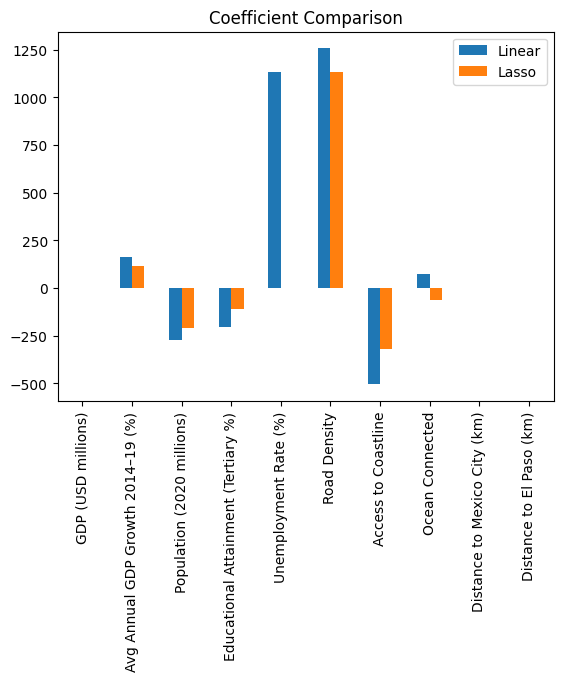

In [150]:
coef_lin = pd.Series(lin_reg.coef_, index=X.columns)
coef_lasso = pd.Series(lasso.coef_, index=X.columns)

comparison = pd.DataFrame({'Linear': coef_lin, 'Lasso': coef_lasso})
comparison.plot(kind='bar', title='Coefficient Comparison')

### OLS Regression

In [155]:
response = data["Avg Annual FDI 2014–19 (USD millions)"]
controls = data.drop(columns=["State", "Avg Annual FDI 2014–19 (USD millions)","High_Investment"])

In [64]:
controls

,GDP (USD millions),Avg Annual GDP Growth 2014–19 (%),Population (2020 millions),Educational Attainment (Tertiary %),Unemployment Rate (%),Access to Coastline,Ocean Connected,Distance to Mexico City (km),Distance to El Paso (km)
0,16315.8,3.0,1.42,20,3.5,0,Not Connected,510,1340
1,36842.1,2.5,3.77,19,3.4,1,Pacific,2200,1120
2,11052.6,3.5,0.80,17,3.2,1,Pacific,1550,1900
3,25263.2,-0.5,1.00,15,3.3,1,Gulf of Mexico,1000,2140
4,21052.6,1.5,5.54,9,2.8,1,Pacific,870,2360
5,44210.5,2.0,3.77,18,3.3,0,Not Connected,1450,460
6,189473.7,1.8,9.21,30,4.0,0,Not Connected,0,1600
7,50000.0,2.2,3.15,21,3.5,0,Not Connected,845,1020
8,6315.8,2.0,0.73,19,2024.1,1,Pacific,700,1800
9,14736.8,2.0,1.85,16,3.2,0,Not Connected,880,1100


In [156]:
X = sm.add_constant(controls)
X["Ocean Connected"] = pd.Categorical(data["Ocean Connected"]).codes
X["Access to Coastline"] = pd.Categorical(data["Access to Coastline"]).codes

In [157]:
model_simpleOLS = sm.OLS(response, X).fit()

In [158]:
print(model_simpleOLS.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Avg Annual FDI 2014–19 (USD millions)   R-squared:                       0.813
Model:                                               OLS   Adj. R-squared:                  0.725
Method:                                    Least Squares   F-statistic:                     9.155
Date:                                   Sun, 08 Dec 2024   Prob (F-statistic):           1.23e-05
Time:                                           21:41:47   Log-Likelihood:                -246.29
No. Observations:                                     32   AIC:                             514.6
Df Residuals:                                         21   BIC:                             530.7
Df Model:                                             10                                         
Covariance Type:                               nonrobust                                         
                    

In [169]:
response = data["Avg Annual FDI 2014–19 (USD millions)"]
controls = data.drop(columns=["State", "Avg Annual FDI 2014–19 (USD millions)","High_Investment",
                              "Ocean Connected","Avg Annual GDP Growth 2014–19 (%)","Ocean Connected",
                              "Unemployment Rate (%)","Access to Coastline"])

In [170]:
X = sm.add_constant(controls)

simple_model = sm.OLS(response, X).fit()
print(simple_model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Avg Annual FDI 2014–19 (USD millions)   R-squared:                       0.788
Model:                                               OLS   Adj. R-squared:                  0.737
Method:                                    Least Squares   F-statistic:                     15.47
Date:                                   Sun, 08 Dec 2024   Prob (F-statistic):           2.42e-07
Time:                                           22:05:56   Log-Likelihood:                -248.35
No. Observations:                                     32   AIC:                             510.7
Df Residuals:                                         25   BIC:                             521.0
Df Model:                                              6                                         
Covariance Type:                               nonrobust                                         
                    

In [178]:
control_list = ["State", "Avg Annual FDI 2014–19 (USD millions)","High_Investment",
                              "Ocean Connected","Avg Annual GDP Growth 2014–19 (%)","Ocean Connected",
                              "Unemployment Rate (%)","Access to Coastline"]
# Add constant for OLS
X = sm.add_constant(data.drop(columns=control_list))

n_iterations = 100000
coefficients_list = []

for i in range(n_iterations):
    # Draw a bootstrap sample
    sample = data.sample(n=len(data), replace=True)
    X_boot = sm.add_constant(sample.drop(columns=control_list))
    y_boot = sample['Avg Annual FDI 2014–19 (USD millions)']
    
    # Fit OLS on the bootstrap sample
    model_boot = sm.OLS(y_boot, X_boot).fit()
    
    # Store the coefficients
    coefficients_list.append(model_boot.params)

coefficients_df = pd.DataFrame(coefficients_list)

In [179]:
coefficients_df

,const,GDP (USD millions),Population (2020 millions),Educational Attainment (Tertiary %),Road Density,Distance to Mexico City (km),Distance to El Paso (km)
0,-121.449994,0.019372,-16.453451,-30.427294,1462.731193,0.663272,-0.551236
1,1526.140297,0.032635,-279.504236,-106.646820,1747.875290,0.087631,-0.454885
2,1210.537767,0.033554,-213.850766,-82.054505,1262.838431,0.483481,-0.534779
3,402.470615,0.026103,-44.711274,-44.762090,1187.170841,0.299932,-0.495485
4,407.705885,0.021943,-133.989169,-66.860588,1918.498848,0.482434,-0.537874
...,...,...,...,...,...,...,...
99995,693.531137,0.029722,-163.099992,-41.090031,1236.094277,0.327310,-0.598142
99996,793.235977,0.031364,-138.739213,25.663896,-436.903804,-0.245193,-0.218818
99997,2247.088025,0.029523,-207.490094,-120.178643,1385.685632,-0.076509,-0.488692
99998,561.920732,-0.002638,109.681766,72.877137,-415.121846,-0.028377,-0.579802


In [181]:
# Calculate 95% confidence intervals from bootstrap distribution
ci_95 = coefficients_df.quantile([0.025, 0.975])
print("95% Bootstrap Confidence Intervals:")
ci_95

95% Bootstrap Confidence Intervals:


,const,GDP (USD millions),Population (2020 millions),Educational Attainment (Tertiary %),Road Density,Distance to Mexico City (km),Distance to El Paso (km)
0.025,-480.305354,-0.007155,-374.981954,-208.648674,-788.666872,-0.664132,-1.171352
0.975,3451.633517,0.058153,149.919750,65.269071,2944.274581,1.106869,-0.105993


In [182]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [190]:
# Assume df is your DataFrame with the reduced set of predictors and target
response = data["Avg Annual FDI 2014–19 (USD millions)"]
controls = data.drop(columns=["State", "Avg Annual FDI 2014–19 (USD millions)","High_Investment"])
predictors = controls.columns
X = controls
y = response

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train["Ocean Connected"] = pd.Categorical(X_train["Ocean Connected"]).codes
X_train["Access to Coastline"] = pd.Categorical(X_train["Access to Coastline"]).codes

X_test["Ocean Connected"] = pd.Categorical(X_test["Ocean Connected"]).codes
X_test["Access to Coastline"] = pd.Categorical(X_test["Access to Coastline"]).codes

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler on the training data only, then transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LassoCV to select alpha through cross-validation
lasso_cv = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
lasso_cv.fit(X_train_scaled, y_train)

# Retrieve the chosen alpha and coefficients
print("Chosen alpha for Lasso:", lasso_cv.alpha_)
print("Lasso coefficients:")
for feature, coef in zip(predictors, lasso_cv.coef_):
    print(f"{feature}: {coef}")

# Evaluate performance on test set
y_pred = lasso_cv.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R²:", r2)

Chosen alpha for Lasso: 18.2191088333644
Lasso coefficients:
GDP (USD millions): 1063.0132642270928
Avg Annual GDP Growth 2014–19 (%): 22.40602676550352
Population (2020 millions): -415.9159122884866
Educational Attainment (Tertiary %): -183.07070562485725
Unemployment Rate (%): -0.0
Road Density: 565.1417918155505
Access to Coastline: -143.3007551338009
Ocean Connected: -14.219470421615076
Distance to Mexico City (km): 236.03221783968013
Distance to El Paso (km): -176.25932890329773
Test MSE: 144016.31208144143
Test R²: -0.23204930055174744


### Clasificación

In [202]:
from sklearn.model_selection import train_test_split

control_list = ["State", "Avg Annual FDI 2014–19 (USD millions)","High_Investment",
                              "Ocean Connected","Avg Annual GDP Growth 2014–19 (%)","Ocean Connected",
                              "Unemployment Rate (%)","Access to Coastline"]

# Assuming df is your DataFrame and 'High_Investment' is your binary target
predictors = ['GDP_USD_millions', 'Population_2020_millions', 'Educational_Attainment_Tertiary',
              'Road_Density', 'Distance_to_MexicoCity_km', 'Distance_to_ElPaso_km']
target = 'High_Investment'

X = data.drop(columns=control_list)
y = data[target]

# Split data into train and test sets to evaluate generalization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Logistic regression often benefits from scaled features
logit_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(random_state=42))
])

logit_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logit', LogisticRegression(random_state=42))])

In [204]:
logit_pipeline.score(X_test, y_test)

0.8571428571428571

In [205]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Logistic Regression - Acc: 0.86, Prec: 0.67, Rec: 1.00, F1: 0.80, AUC: 0.80
Random Forest       - Acc: 0.71, Prec: 0.50, Rec: 0.50, F1: 0.50, AUC: 0.80


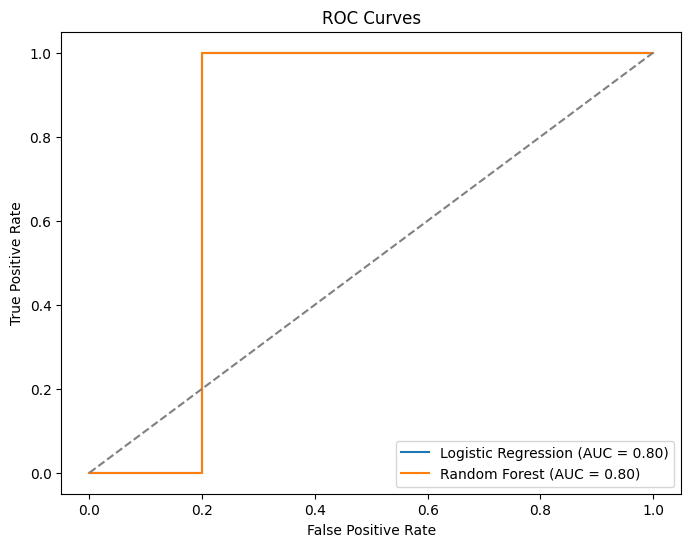

In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Logistic Regression Predictions
y_pred_logit = logit_pipeline.predict(X_test)
y_prob_logit = logit_pipeline.predict_proba(X_test)[:, 1]  # probabilities for ROC

# Random Forest Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
acc_logit = accuracy_score(y_test, y_pred_logit)
prec_logit = precision_score(y_test, y_pred_logit)
rec_logit = recall_score(y_test, y_pred_logit)
f1_logit = f1_score(y_test, y_pred_logit)
auc_logit = roc_auc_score(y_test, y_prob_logit)

# Evaluate Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("Logistic Regression - Acc: {:.2f}, Prec: {:.2f}, Rec: {:.2f}, F1: {:.2f}, AUC: {:.2f}".format(
    acc_logit, prec_logit, rec_logit, f1_logit, auc_logit))

print("Random Forest       - Acc: {:.2f}, Prec: {:.2f}, Rec: {:.2f}, F1: {:.2f}, AUC: {:.2f}".format(
    acc_rf, prec_rf, rec_rf, f1_rf, auc_rf))

# Plot ROC Curves
fpr_logit, tpr_logit, _ = roc_curve(y_test, y_prob_logit)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_logit, tpr_logit, label='Logistic Regression (AUC = {:.2f})'.format(auc_logit))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

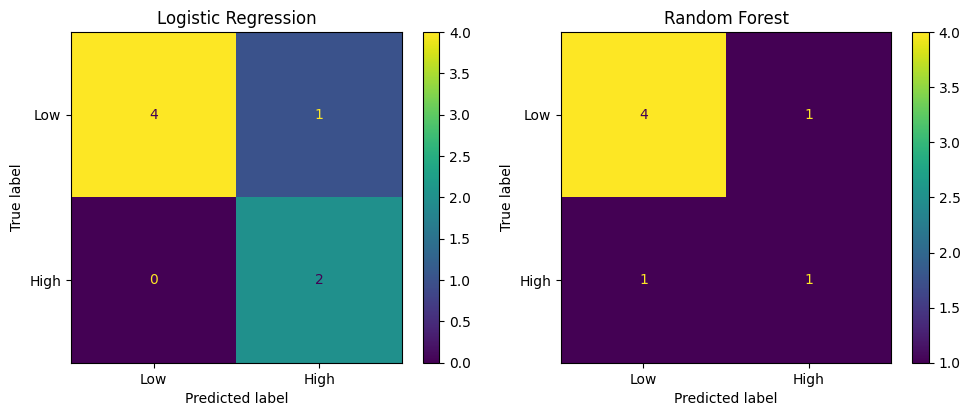

In [207]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_logit = confusion_matrix(y_test, y_pred_logit)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
ConfusionMatrixDisplay(cm_logit, display_labels=["Low", "High"]).plot(ax=axes[0], values_format='d')
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay(cm_rf, display_labels=["Low", "High"]).plot(ax=axes[1], values_format='d')
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

In [208]:
# Extract the logistic regression step from the pipeline
logit_model = logit_pipeline.named_steps['logit']

# Get coefficients (this will be a 2D array: [ [coef1, coef2, ...] ])
coeffs = logit_model.coef_[0]

# Combine into a DataFrame
coeff_df = pd.DataFrame({
    'Feature': predictors,
    'Coefficient': coeffs
}).sort_values(by='Coefficient', ascending=False)

# Print the DataFrame
print("Logistic Regression Coefficients:")
print(coeff_df)

Logistic Regression Coefficients:
                           Feature  Coefficient
0                 GDP_USD_millions     0.828198
1         Population_2020_millions     0.611095
2  Educational_Attainment_Tertiary     0.099991
4        Distance_to_MexicoCity_km    -0.012667
3                     Road_Density    -0.022426
5            Distance_to_ElPaso_km    -0.785523


In [209]:
importances = rf.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(feat_imp_df)

Random Forest Feature Importances:
                           Feature  Importance
0                 GDP_USD_millions    0.305356
1         Population_2020_millions    0.212904
5            Distance_to_ElPaso_km    0.184919
4        Distance_to_MexicoCity_km    0.109570
2  Educational_Attainment_Tertiary    0.099716
3                     Road_Density    0.087535


In [210]:
comparison_df = coeff_df.merge(feat_imp_df, on='Feature', how='outer')
print("Comparison of Logistic Coefficients and Random Forest Importances:")
print(comparison_df)

Comparison of Logistic Coefficients and Random Forest Importances:
                           Feature  Coefficient  Importance
0            Distance_to_ElPaso_km    -0.785523    0.184919
1        Distance_to_MexicoCity_km    -0.012667    0.109570
2  Educational_Attainment_Tertiary     0.099991    0.099716
3                 GDP_USD_millions     0.828198    0.305356
4         Population_2020_millions     0.611095    0.212904
5                     Road_Density    -0.022426    0.087535
